In [3]:
import mne
import matplotlib


mne.__version__

In [4]:
raw = mne.io.read_raw_edf("S001R04.edf", preload=True)
mne.set_log_level("WARNING")
raw

Extracting EDF parameters from H:\DOCUMENTS\Nothing\CAPSTONE\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


<RawEDF | S001R04.edf, 64 x 20000 (125.0 s), ~9.8 MB, data loaded>

In [5]:
raw = mne.io.read_raw_edf("S001R04.edf", preload=True)
mne.set_log_level("WARNING")
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

In [6]:
raw = mne.io.read_raw_edf("S001R04.edf", preload=True)
mne.set_log_level("WARNING")
raw.info["sfreq"]

160.0

In [7]:
raw.rename_channels(lambda s: s.strip("."))

<RawEDF | S001R04.edf, 64 x 20000 (125.0 s), ~9.8 MB, data loaded>

In [8]:
mne.channels.get_builtin_montages()

['EGI_256',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'biosemi128',
 'biosemi16',
 'biosemi160',
 'biosemi256',
 'biosemi32',
 'biosemi64',
 'easycap-M1',
 'easycap-M10',
 'mgh60',
 'mgh70',
 'standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed',
 'artinis-octamon',
 'artinis-brite23']

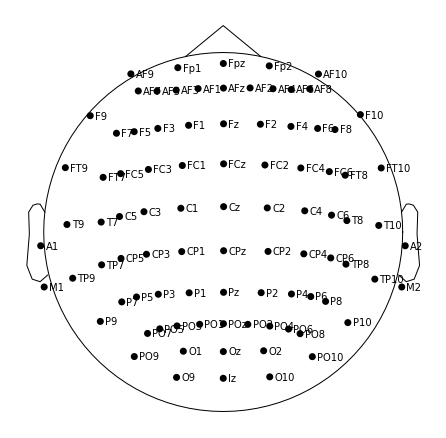

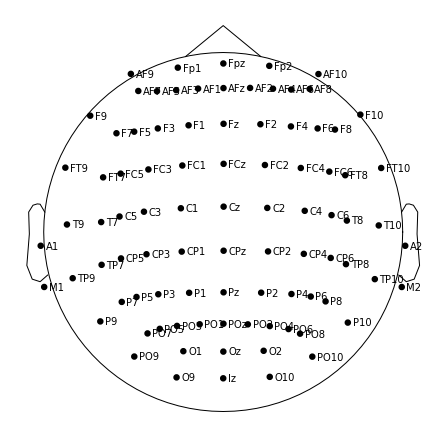

In [9]:
montage = mne.channels.make_standard_montage("standard_1020")
montage.plot()

In [10]:
import mne

raw = mne.io.read_raw_edf("S001R04.edf", preload=True)
raw.rename_channels(lambda s: s.strip("."))
raw.set_montage("standard_1020", match_case=False)
raw.set_eeg_reference("average")

<RawEDF | S001R04.edf, 64 x 20000 (125.0 s), ~9.9 MB, data loaded>

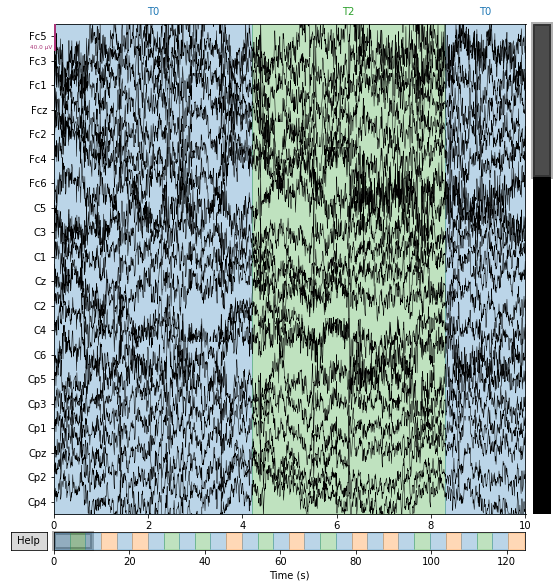

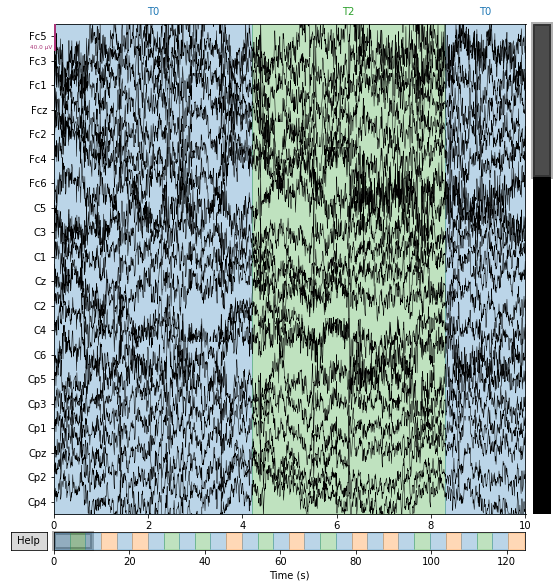

In [11]:
raw.plot()

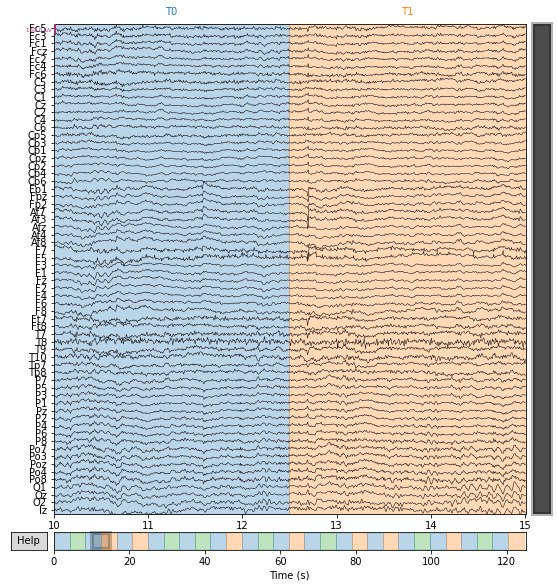

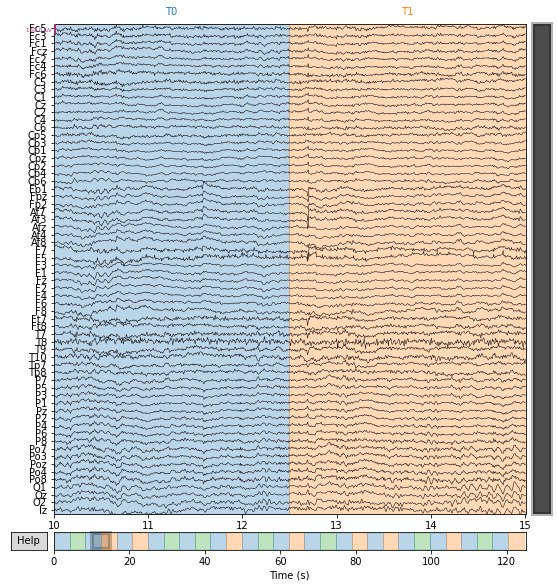

In [12]:
raw.plot(n_channels=64, duration=5, scalings={"eeg": 75e-6}, start=10)

In [12]:
raw.annotations

<Annotations | 30 segments: T0 (15), T1 (8), T2 (7)>

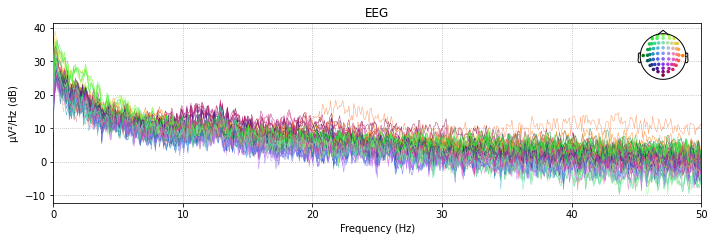

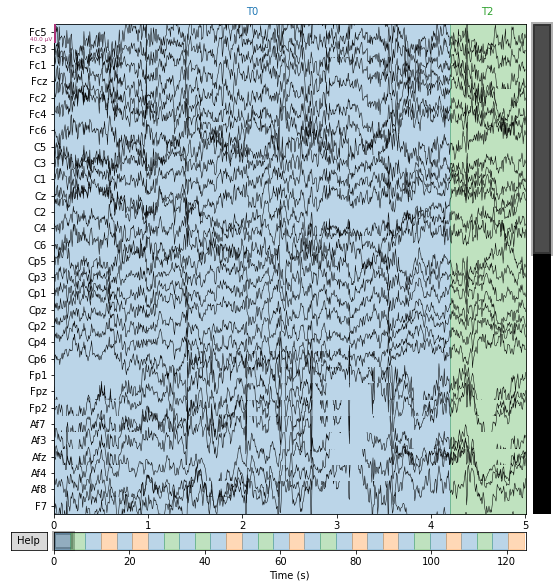

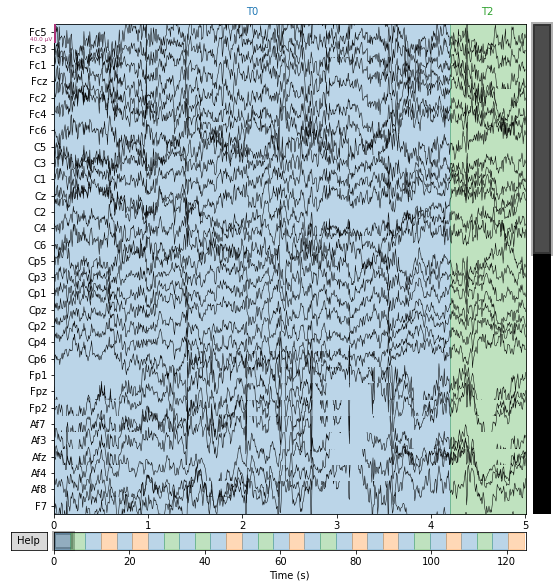

In [13]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)



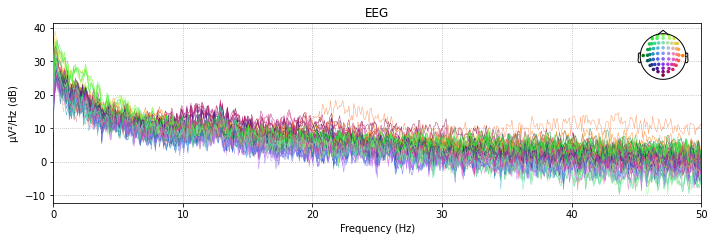

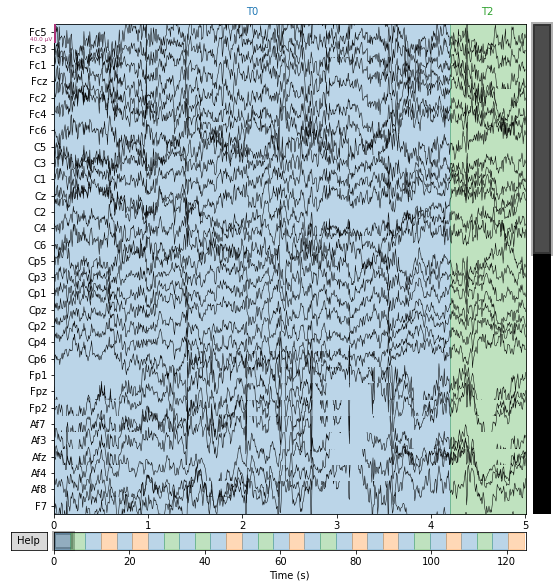

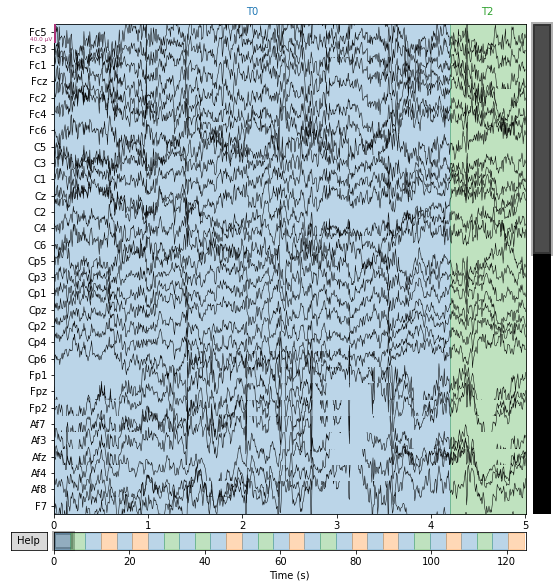

In [14]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)

In [14]:
with open("S001R04_bads.txt") as f:
    raw.info["bads"] = f.read().strip().split(",")